In [40]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


# read the data

df = pd.read_csv(r'/Users/Argin_Mac/movies.csv')

In [41]:
# Let's take a look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,1980-06-13,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,1980-07-02,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,1980-07-25,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [42]:
# Check for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [43]:
# Data Types for our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [34]:
# Change data types of columns

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [44]:
# create correct year column

df['Year_Correct'] = df['released'].astype('str').str[:4]
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year_Correct
0,The Shining,R,Drama,1980,1980-06-13,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,1980-07-02,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,1980-07-25,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7661,More to Life,NaN,Drama,2020,2020-10-23,3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90.0,2020
7662,Dream Round,NaN,Comedy,2020,2020-02-07,4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0,2020
7663,Saving Mbango,NaN,Drama,2020,2020-04-27,5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,NaN,2020
7664,It's Just Us,NaN,Drama,2020,2020-10-01,NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120.0,2020


In [45]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year_Correct
5445,Avatar,PG-13,Action,2009,2009-12-18,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7443,Avengers: Endgame,PG-13,Action,2019,2019-04-26,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,1997-12-19,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6661,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015-12-18,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7242,Avengers: Infinity War,PG-13,Action,2018,2018-04-27,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,Boardinghouse,R,Comedy,1982,1983-10-21,3.8,651.0,John Wintergate,John Wintergate,John Wintergate,United States,10000,0,Blustarr,98.0,1983
326,Love Child,R,Crime,1982,1982-10-15,5.7,253.0,Larry Peerce,Anne Gerard,Amy Madigan,United States,0,0,The Ladd Company,96.0,1982
324,The Wizard of Oz,Not Rated,Animation,1982,1982-10-06,6.8,352.0,Fumihiko Takayama,Yoshimitsu Banno,Aileen Quinn,United States,0,0,Alan Enterprises,78.0,1982
1199,Walk Like a Man,PG,Comedy,1987,1987-04-17,4.8,1400.0,Melvin Frank,Robert Klane,Christopher Lloyd,United States,0,0,Metro-Goldwyn-Mayer (MGM),86.0,1987


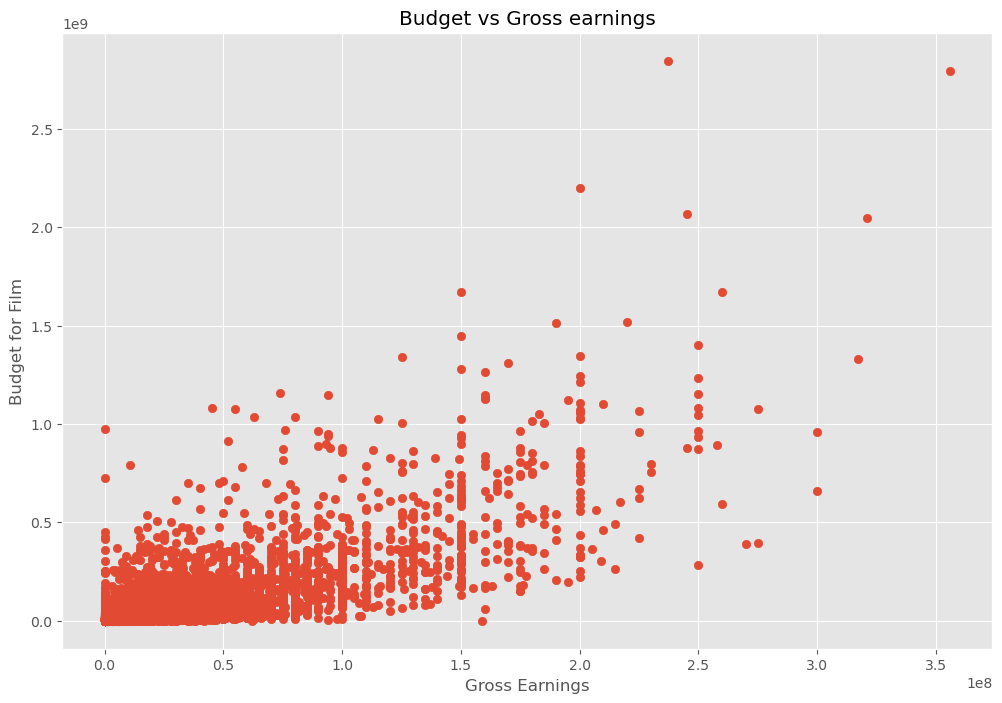

In [50]:
# scatter plot with Budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

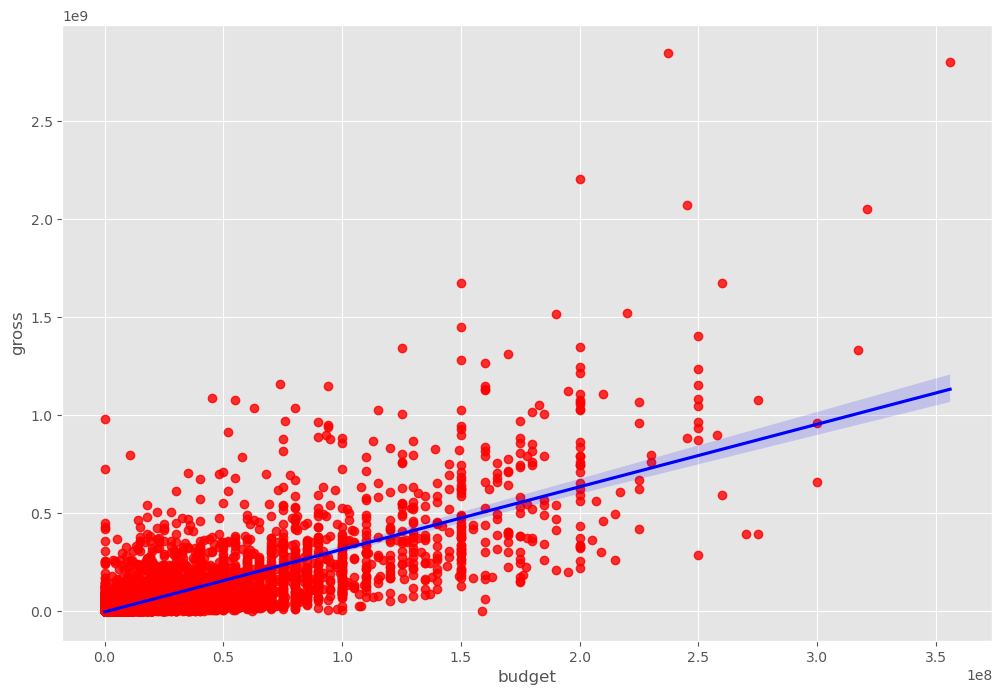

In [51]:
# Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color":"blue"})

In [52]:
# Correlations

df.corr(method='pearson') # pearson, kendall, spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.098171,0.222952,0.309407,0.262038,0.120811
score,0.098171,1.000000,0.409221,0.055549,0.186323,0.399451
votes,0.222952,0.409221,1.000000,0.486901,0.632860,0.309212
budget,0.309407,0.055549,0.486901,1.000000,0.750141,0.269510
gross,0.262038,0.186323,0.632860,0.750141,1.000000,0.245235
runtime,0.120811,0.399451,0.309212,0.269510,0.245235,1.000000


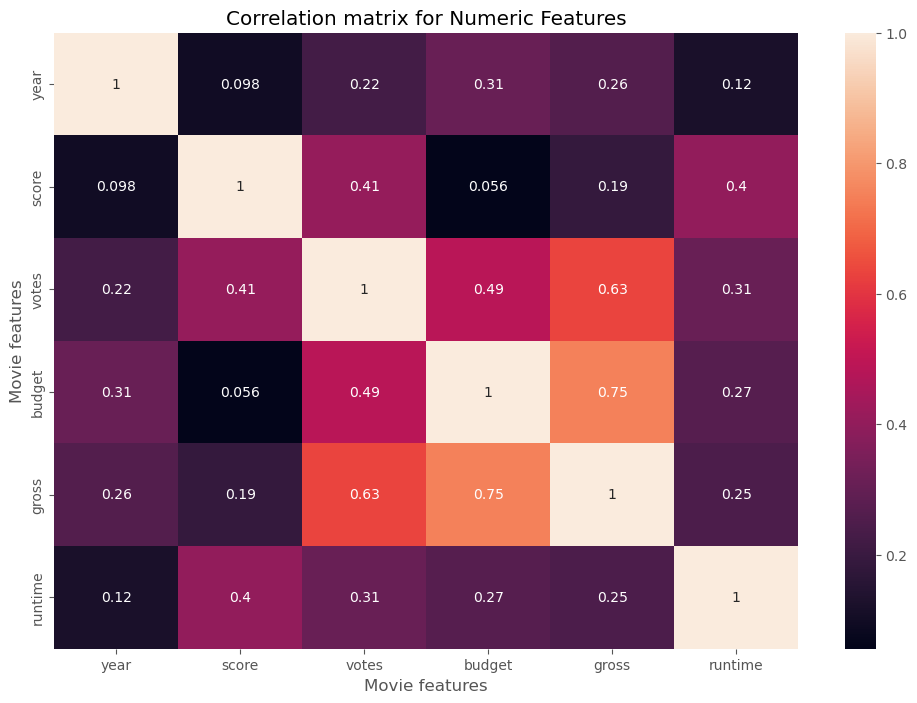

In [53]:
# correlation heatmap

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation matrix for Numeric Features")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()

In [66]:
# Using factorize - this assigns a random numeric value for each unique categorical value
df_factorize = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

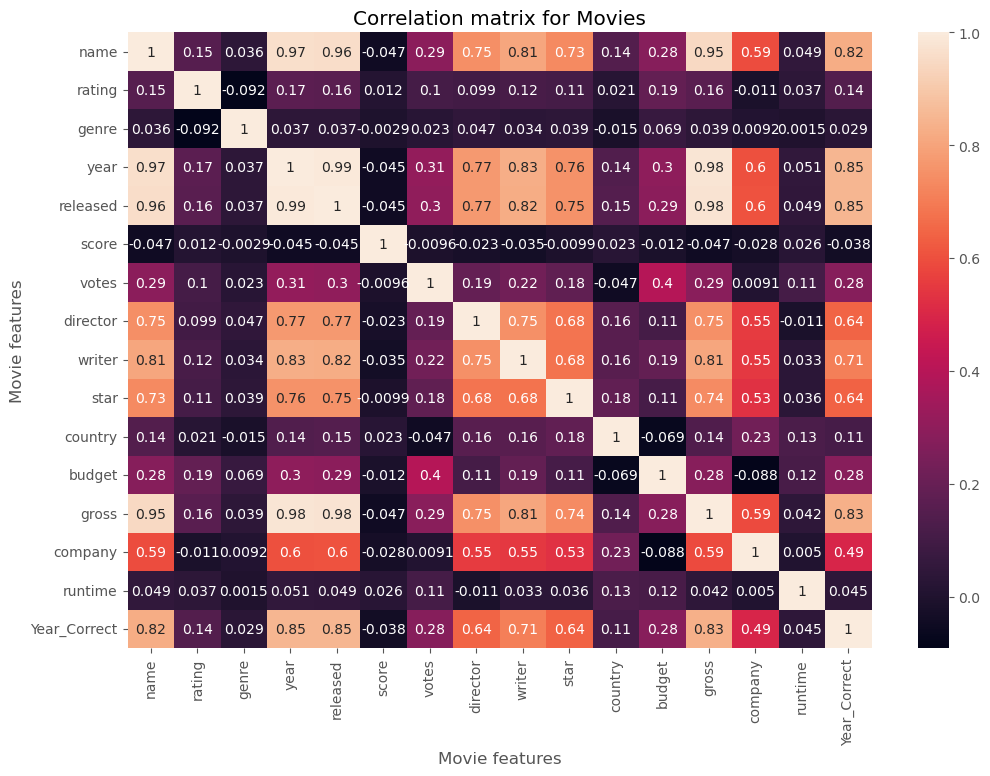

In [68]:
# updated correlation heatmap

correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation matrix for Movies")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()

In [64]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
strong_pairs = sorted_pairs[(abs(sorted_pairs) > 0.5) & (abs(sorted_pairs) != 1)]

print(strong_pairs)

star          company         0.527587
company       star            0.527587
writer        company         0.547258
company       writer          0.547258
              director        0.552612
director      company         0.552612
gross         company         0.587871
company       gross           0.587871
              name            0.592092
name          company         0.592092
company       year            0.601992
year          company         0.601992
company       released        0.604148
released      company         0.604148
star          Year_Correct    0.640012
Year_Correct  star            0.640012
director      Year_Correct    0.642860
Year_Correct  director        0.642860
star          writer          0.676389
writer        star            0.676389
star          director        0.682539
director      star            0.682539
Year_Correct  writer          0.708629
writer        Year_Correct    0.708629
star          name            0.731467
name          star       